# Benchmark DATA Test

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [9]:
import numpy as np
import pandas as pd
import graphviz
import cProfile
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.26.4', '2.2.2', '0.20.3', '2.0.5']


## Test data
We create test data consisting of 5 variables.

In [ ]:
B0 = [
    [0,-0.12,0,0,0],
    [0,0,0,0,0],
    [-0.41,0.01,0,-0.02,0],
    [0.04,-0.22,0,0,0],
    [0.15,0,-0.03,0,0],
]
B1 = [
    [-0.32,0,0.12,0.32,0],
    [0,-0.35,-0.1,-0.46,0.4],
    [0,0,0.37,0,0.46],
    [-0.38,-0.1,-0.24,0,-0.13],
    [0,0,0,0,0],
]
causal_order = [1, 0, 3, 2, 4]

# data generated from B0 and B1
#X = pd.read_csv('data/sample_data_var_lingam.csv')
X = pd.read_csv('examples/data/data_benchmark_1/simulated_ts_data/7ts0h/data_9.csv')
X
X = X.drop(columns='time_index')
X


,E,B,F,C,H,D,A
0,1.332230,0.219227,0.310077,-0.146667,-0.088156,-0.152578,0.141881
1,-1.430614,0.288400,-0.235040,-0.021957,-0.223951,-2.172280,-0.144718
2,1.085547,0.431790,0.039571,-0.003746,-0.215044,1.430679,-0.656546
3,-1.375373,-0.996132,-0.029043,0.081063,-0.095161,-1.166880,0.916566
4,2.011792,-0.419065,-0.024682,0.081143,-0.119604,0.309551,-0.981195
...,...,...,...,...,...,...,...
3995,-0.532240,0.890196,-0.937315,0.037974,-0.826258,1.415559,-0.372510
3996,-0.135315,0.612208,0.472024,0.004743,-0.558029,-1.165737,0.787215
3997,-0.328581,0.498961,-0.710340,-2.341093,-0.541259,0.769321,-1.835886
3998,-0.110199,0.418988,-0.754838,-0.326581,-0.915029,-0.618421,1.262929


In [2]:
X = pd.read_csv('data/data_benchmark_1/FinanceCPT/returns/random-rels_20_1C_returns800012000.csv')
X

,-0.28727973,1.11039,0.13886152,-0.16038627,0.3310153,0.5760514,0.5671629,0.53685844,0.31594187,0.7721211,...,0.713635,0.73015655,0.08819908,0.69283,0.9520643,0.22059788,0.43578306,0.28988022,0.2997847,0.45974907
0,0.406096,0.446268,0.393240,0.075963,-0.076504,-0.220000,-0.153262,0.627334,-0.232301,0.137087,...,-0.240250,-0.364227,-1.044445,0.260800,-0.858211,-0.417141,-0.557903,-1.100305,-0.398259,0.026610
1,-0.079366,-0.118827,-0.412960,-0.433989,0.100631,0.772958,-0.066781,-0.289096,-0.221991,-0.330813,...,-0.637365,0.938621,0.061780,0.664401,0.185652,-0.419645,-0.961069,0.112100,-0.071365,0.767187
2,-1.513736,-0.079495,-0.626552,-0.536915,0.255203,-1.219465,-0.614440,-0.708881,-0.522428,-0.820703,...,-0.628657,0.184863,-0.548335,-0.183989,-0.039219,-0.575879,0.003022,0.764834,-0.168977,0.976815
3,0.044545,0.013248,-0.258362,0.314706,0.913452,-0.779792,-0.190186,0.929680,-0.056810,0.546451,...,-0.204783,-0.238735,-0.383289,1.171900,0.376620,-0.062594,0.034994,0.997040,-0.018625,0.110510
4,0.357193,0.731226,0.495374,-0.147085,0.357405,1.381014,0.528431,0.532633,0.199669,0.721807,...,1.041132,1.126223,0.067642,0.491180,0.617561,0.499438,0.644044,0.650306,0.206141,1.566304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.305815,0.916183,0.280065,0.638372,0.843574,1.347471,0.989528,0.342246,0.613698,0.445132,...,0.608066,-0.386144,-0.025071,-0.296360,0.377156,-0.139855,0.001518,-0.519562,0.819123,0.772150
3995,2.172325,2.169870,2.154993,1.724695,1.483346,1.815692,2.476148,2.118259,2.328791,2.479952,...,2.321131,2.680099,1.119245,0.492490,1.579262,0.816192,1.529823,0.547759,0.783176,0.937678
3996,0.132175,0.169827,0.203523,0.015428,0.530822,-0.076056,0.044785,1.028404,0.349911,0.406883,...,0.448413,0.137314,0.239768,0.928360,1.148814,0.725830,0.394153,1.442482,0.776712,1.136978
3997,-2.521986,-1.035757,-2.268137,-1.450079,-2.044564,-1.569018,-2.015961,-2.013632,-1.883732,-2.426984,...,-1.971005,-1.541337,-1.228580,-2.017774,-1.834704,-1.573387,-1.132606,-1.700569,-1.594748,-2.217736


In [17]:
X = pd.read_csv('data/data_benchmark_1/fMRI_processed_by_Nauta/returns/timeseries28.csv')
X

,0,1,2,3,4
0,-1.21040,-1.98520,-2.154800,-2.01010,-1.86620
1,-0.89058,-0.82086,-1.341900,-1.28110,-1.45670
2,-0.63658,3.21930,0.615160,-0.43579,-0.87458
3,0.97007,3.69330,1.163400,1.21400,0.61011
4,3.08530,1.70610,-0.041317,0.78754,1.80940
...,...,...,...,...,...
95,-4.09690,0.67404,-0.587830,-0.51365,-0.56981
96,-1.44430,2.43610,1.488400,0.52716,0.60059
97,1.07870,0.31162,4.237000,2.40000,1.90660
98,1.10770,-2.01920,2.659200,1.51570,1.59210


## Causal Discovery
To run causal discovery, we create a `VARLiNGAM` object and call the `fit` method.

In [4]:
X = pd.read_csv('data/large-data/sp500.csv')
X

,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,...,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZBRA,ZION
0,25.85,41.54,165.298,21.20,7.97,45.12,33.21,31.10,27.76,28.03,...,37.90,19.680,21.65,68.41,33.01,8.46,33.72,46.60,24.95,16.43
1,25.22,41.50,165.180,21.01,7.94,45.00,33.33,31.00,27.56,27.56,...,37.02,19.510,21.34,68.18,32.89,8.34,33.36,46.24,24.98,16.28
2,25.29,41.62,166.550,21.14,7.83,45.06,34.41,31.49,28.15,28.02,...,36.93,19.610,21.45,68.26,33.02,8.43,33.57,47.44,25.27,16.39
3,25.86,41.20,170.310,21.29,7.84,45.63,34.69,32.05,28.80,28.91,...,37.58,19.610,22.21,69.18,33.46,8.64,34.04,49.11,25.62,16.74
4,26.41,41.50,172.930,21.17,7.81,45.91,34.50,32.51,29.30,28.74,...,38.81,19.540,23.16,70.65,33.50,8.64,34.19,48.95,25.92,16.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,85.30,160.57,284.270,85.42,172.30,87.28,211.61,329.64,119.72,46.08,...,52.56,62.860,98.49,70.02,57.21,37.37,100.33,150.87,254.33,51.53
2600,85.45,159.27,289.910,85.05,171.01,87.28,212.05,331.20,119.73,46.20,...,52.24,62.790,98.68,70.13,56.53,37.48,101.79,150.30,254.42,51.66
2601,85.42,158.35,289.800,84.91,169.27,87.40,212.22,330.79,119.45,46.30,...,51.91,63.115,98.42,69.89,56.84,37.31,101.90,150.01,256.00,51.50
2602,84.90,159.12,291.520,83.64,167.29,86.80,210.64,328.34,118.86,46.12,...,51.85,63.290,97.68,69.48,56.40,36.90,100.64,148.75,254.11,51.77


In [6]:
X = pd.read_csv('data/large-data/csi300.csv')
X = X.iloc[:, 1:]
X

,000001,000002,000063,000100,000157,000301,000338,000425,000538,000568,...,601766,601808,601857,601872,601898,601899,601919,601939,601988,601998
0,19.00,9.89,34.30,3.41,21.20,5.43,39.68,26.90,41.88,26.73,...,4.51,13.80,12.86,4.85,10.97,8.11,12.36,5.25,3.74,4.91
1,19.84,10.07,34.30,3.39,21.45,5.42,39.61,27.26,41.90,26.75,...,4.53,13.94,12.98,4.92,11.31,8.05,12.41,5.53,3.83,5.18
2,20.65,10.98,35.20,3.51,22.85,5.68,41.75,29.20,42.50,28.23,...,4.67,14.50,13.39,5.11,12.05,8.79,13.19,5.73,3.95,5.28
3,20.73,11.17,35.66,3.51,23.50,5.79,42.46,29.54,44.15,28.95,...,4.63,14.45,13.38,5.11,12.06,9.01,13.17,5.69,3.94,5.28
4,20.81,11.12,36.42,3.54,23.30,5.91,42.90,29.82,45.40,30.55,...,4.65,14.45,13.36,5.12,12.09,9.24,13.25,5.70,3.94,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,16.30,30.29,33.75,4.48,6.53,5.19,15.29,5.29,88.54,80.86,...,6.97,18.76,5.72,3.54,4.81,4.14,5.09,7.17,3.66,6.10
2509,16.47,31.12,33.90,4.69,6.52,5.19,15.27,5.34,87.99,80.73,...,7.00,19.21,5.73,3.54,4.86,4.19,5.33,7.23,3.68,6.14
2510,16.63,31.00,33.64,4.52,6.54,5.19,15.36,5.44,87.66,81.71,...,7.02,19.00,5.78,3.54,4.90,4.46,5.23,7.25,3.69,6.16
2511,16.57,31.57,34.35,4.46,6.58,5.19,15.65,5.48,88.10,85.73,...,7.15,19.08,5.82,3.54,5.02,4.49,5.25,7.23,3.71,6.17


In [11]:
X = pd.read_csv('data/PublicData/Middleware_oriented_message_Activity/Data_without_incidents/returns/monitoring_metrics_1.csv')
X = X.iloc[:, 1:]
X

,ram_global_prct,cpu_global_prct,disk_io_read_mega_byte,disk_io_write_mega_byte,consumers_causality_1,messages_causality_1,publish_rate_causality_1
0,76.0,2.6,326608.52,83692.31,0,0,0.0
1,76.5,5.0,326608.52,83692.32,41,0,0.0
2,76.4,2.9,326608.52,83692.32,41,0,1.2
3,76.6,4.6,326608.52,83692.32,6,0,1.2
4,76.6,4.1,326608.52,83692.45,6,0,1.2
...,...,...,...,...,...,...,...
283,97.6,10.0,326623.47,83770.58,6,111729,692.8
284,97.6,5.9,326623.58,83770.59,6,111729,811.6
285,97.8,8.8,326623.70,83770.59,15,111729,811.6
286,97.9,9.2,326623.70,83770.67,49,111729,811.6


In [12]:
import time
start_time = time.time()
model = lingam.VARLiNGAM()
#model.fit(X)
cProfile.run('model.fit(X)', sort='time')
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

Estimate VAR coefficients time: 0.013956785202026367 seconds
precomputation Execution time: 0.004983425140380859 seconds
Measure method: pwling_v2
search causal order Execution time: 0.0034487247467041016 seconds
estimate adjacency matrix Execution time: 0.03322649002075195 seconds
         83151 function calls (82916 primitive calls) in 0.120 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.012    0.012    0.054    0.054 var_lingam.py:372(_pruning)
       13    0.010    0.001    0.014    0.001 _least_angle.py:413(_lars_path_solver)
        1    0.008    0.008    0.015    0.015 var_lingam.py:318(_estimate_var_coefs)
       35    0.005    0.000    0.008    0.000 _basic.py:1113(lstsq)
     1311    0.005    0.000    0.005    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.004    0.004    0.004    0.004 linalg.py:2191(lstsq)
      233    0.003    0.000    0.023    0.000 validation.py:721(check_arra

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [13]:
model.causal_order_

[3, 5, 6, 4, 0, 1, 2]

Also, using the `adjacency_matrices_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [14]:
# B0
B0_result=model.adjacency_matrices_[0]
B0_result

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [15.984,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.015,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

In [15]:
# B1
B1_result=model.adjacency_matrices_[1]
B1_result

array([[  0.986,  -0.003,   0.   ,   0.   ,  -0.001,  -0.   ,   0.   ],
       [-15.994,   0.582,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.032,   0.   ,   0.954,   0.   ,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.997,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.368,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   1.006,   0.   ],
       [  9.909,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.707]])

In [16]:
# B2
B2_result=model.adjacency_matrices_[2]
B2_result

IndexError: index 2 is out of bounds for axis 0 with size 2

In [17]:
model.residuals_

array([[   0.357,   -1.484,    0.087, ...,   24.398,  -18.085,    9.21 ],
       [  -0.175,   -4.198,   -0.039, ...,    9.976,  120.09 ,   -4.57 ],
       [   0.118,   -1.399,   -0.017, ...,  -25.09 ,  128.476,   -3.998],
       ...,
       [   0.066,    0.369,    0.013, ...,   -4.23 , -625.045,   30.142],
       [  -0.011,   -0.624,   -0.162, ...,   26.633, -602.054,   25.508],
       [  -0.063,   -0.952,   -0.244, ...,   14.442, -469.792,   16.823]])

Using `DirectLiNGAM` for the `residuals_` properties, we can calculate B0 matrix.

In [18]:
dlingam = lingam.DirectLiNGAM()
dlingam.fit(model.residuals_)
dlingam.adjacency_matrix_

Measure method: pwling
search causal order Execution time: 0.028415918350219727 seconds
estimate adjacency matrix Execution time: 0.013952016830444336 seconds


array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [16.064,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

In [19]:
import numpy as np

def precision_recall_f1(matrix1, matrix2):
    assert matrix1.shape == matrix2.shape, "Matrices must have the same shape"

    # Convert matrices to boolean: True for non-zero, False for zero
    bool_matrix1 = matrix1 != 0
    bool_matrix2 = matrix2 != 0

    # Calculate True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
    TP = np.sum(np.logical_and(bool_matrix1, bool_matrix2))
    #print(TP)
    FP = np.sum(np.logical_and(np.logical_not(bool_matrix1), bool_matrix2))
    #print(FP)
    FN = np.sum(np.logical_and(bool_matrix1, np.logical_not(bool_matrix2)))
    TN = np.sum(np.logical_and(np.logical_not(bool_matrix1), np.logical_not(bool_matrix2)))
    #print(TN)

    # Compute precision, recall, and f1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP+TN)/(TP+TN+FP+FN)

    return precision, recall, f1_score,accuracy

# Compute the structural hamming distance
def structural_hamming_distance(matrix1, matrix2):
    assert matrix1.shape == matrix2.shape, "Matrices must have the same shape"

    # Convert matrices to boolean: True for non-zero, False for zero
    bool_matrix1 = matrix1 != 0
    bool_matrix2 = matrix2 != 0

    # Compute the Hamming distance
    distance = np.sum(bool_matrix1 != bool_matrix2)

    return distance

In [11]:
# Load the CSV file
file_path = 'data/data_benchmark_1/FinanceCPT/ground_truth/random-rels_20_1C.csv'  # Change this to your actual file path

In [28]:
file_path = 'data/data_benchmark_1/fMRI_processed_by_Nauta/ground_truth/sim28_gt_processed.csv'  # Change this to your actual file path

In [20]:
import pandas as pd

# Define the input and output file paths
txt_file_path = 'data/PublicData/Middleware_oriented_message_Activity/Data_without_incidents/ground_truth/monitoring_metrics_All.txt'
csv_file_path = 'data/PublicData/Middleware_oriented_message_Activity/Data_without_incidents/ground_truth/monitoring_metrics_All.csv'

# Read the TXT file and add an 'edge' column
data = pd.read_csv(txt_file_path, sep=' ', header=None)
data.columns = ['cause', 'effect']
data['edge'] = 1

# Save the dataframe to a CSV file
data.to_csv(csv_file_path, index=False)


In [21]:
import pandas as pd

# Load the uploaded dataset
file_path_1 = 'data/PublicData/Middleware_oriented_message_Activity/Data_without_incidents/returns/monitoring_metrics_1.csv'
file_path_all = 'data/PublicData/Middleware_oriented_message_Activity/Data_without_incidents/ground_truth/monitoring_metrics_All.csv'

# Load the data
data_1 = pd.read_csv(file_path_1)
data_all = pd.read_csv(file_path_all)

# Display the first few rows of each dataset to understand the structure
data_1.head(), data_all.head()


(    timestamp  ram_global_prct  cpu_global_prct  disk_io_read_mega_byte  \
 0  1638884583             76.0              2.6               326608.52   
 1  1638884584             76.5              5.0               326608.52   
 2  1638884586             76.4              2.9               326608.52   
 3  1638884587             76.6              4.6               326608.52   
 4  1638884588             76.6              4.1               326608.52   
 
    disk_io_write_mega_byte  consumers_causality_1  messages_causality_1  \
 0                 83692.31                      0                     0   
 1                 83692.32                     41                     0   
 2                 83692.32                     41                     0   
 3                 83692.32                      6                     0   
 4                 83692.45                      6                     0   
 
    publish_rate_causality_1  
 0                       0.0  
 1                    

In [22]:
# Extract feature names (excluding 'timestamp')
features = data_1.columns[1:]

# Create a mapping from feature names to integers
feature_mapping = {feature: idx for idx, feature in enumerate(features)}

# Rename the columns in data_1
data_1_renamed = data_1.rename(columns=feature_mapping)

# Include the 'timestamp' column in the renamed DataFrame
data_1_renamed = data_1_renamed[['timestamp'] + list(feature_mapping.values())]

# Display the renamed DataFrame
data_1_renamed.head()


,timestamp,0,1,2,3,4,5,6
0,1638884583,76.0,2.6,326608.52,83692.31,0,0,0.0
1,1638884584,76.5,5.0,326608.52,83692.32,41,0,0.0
2,1638884586,76.4,2.9,326608.52,83692.32,41,0,1.2
3,1638884587,76.6,4.6,326608.52,83692.32,6,0,1.2
4,1638884588,76.6,4.1,326608.52,83692.45,6,0,1.2


In [23]:
# Apply the same mapping to 'cause' and 'effect' columns in data_all
data_all_updated = data_all.replace({'cause': feature_mapping, 'effect': feature_mapping})

# Display the updated ground truth DataFrame
data_all_updated.head()


C:\Users\18705\AppData\Local\Temp\ipykernel_35116\4268951633.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_all_updated = data_all.replace({'cause': feature_mapping, 'effect': feature_mapping})


,cause,effect,edge
0,6,5,1
1,4,5,1
2,6,1,1
3,4,1,1
4,6,0,1


In [2]:
file_path ='data/PublicData/Middleware_oriented_message_Activity/Data_without_incidents/ground_truth/monitoring_metrics_All.csv'

In [24]:
data = pd.read_csv(file_path, header=None)
data = data_all_updated
data.columns = ['cause', 'effect', 'edge']

# Determine the size of the causality matrix
dim=7
# Create an empty matrix of appropriate size
causality_matrix = np.zeros((dim, dim), dtype=int)

# Populate the matrix with the 'edge' values
for _, row in data.iterrows():
    causality_matrix[row['effect'], row['cause']] = row['edge']

# Display the causality matrix
print(causality_matrix)
print(causality_matrix.shape)

[[0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0]]
(7, 7)


In [3]:
data = pd.read_csv(file_path, header=None)
data.columns = ['cause', 'effect', 'edge']

# Determine the size of the causality matrix
num_causes = data['cause'].max() + 1
num_effects = data['effect'].max() + 1
dim=max(num_causes, num_effects)
# Create an empty matrix of appropriate size
causality_matrix = np.zeros((dim, dim), dtype=int)

# Populate the matrix with the 'edge' values
for _, row in data.iterrows():
    causality_matrix[row['effect'], row['cause']] = row['edge']

# Display the causality matrix
print(causality_matrix)
print(causality_matrix.shape)

TypeError: can only concatenate str (not "int") to str

In [25]:
result = np.zeros_like(model.adjacency_matrices_[0])
for idx, adj_matrix in enumerate(model.adjacency_matrices_):
    #result=np.maximum(result, adj_matrix)
    result += np.abs(adj_matrix)
    #print(f"B{idx} result:")
    #print(adj_matrix)
#result = np.abs(B0_result) + np.abs(B1_result)# + np.abs(B2_result)
print("B result:")
print(result)

B result:
[[ 0.986  0.003  0.     0.     0.001  0.     0.   ]
 [31.978  0.582  0.     0.     0.     0.     0.   ]
 [ 0.032  0.015  0.954  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.997  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.368  0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.006  0.   ]
 [ 9.909  0.     0.     0.     0.     0.     0.707]]


In [26]:
precision, recall, f1_score, accuracy = precision_recall_f1(causality_matrix, result)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print(f"Accuracy: {accuracy}")

Precision: 0.125
Recall: 0.2
F1-score: 0.15384615384615385
Accuracy: 0.5510204081632653


In [27]:
shd = structural_hamming_distance(causality_matrix, result)
#print(causality_matrix)
#print(B0_result)
print(f"Structual Hamming Distance of B0: {shd}")
error_rate=shd/result.shape[0]**2
print(f"Error rate: {error_rate}")
print(f"Accuracy: {1-error_rate}")

Structual Hamming Distance of B0: 22
Error rate: 0.4489795918367347
Accuracy: 0.5510204081632653


We can draw a causal graph by utility funciton.

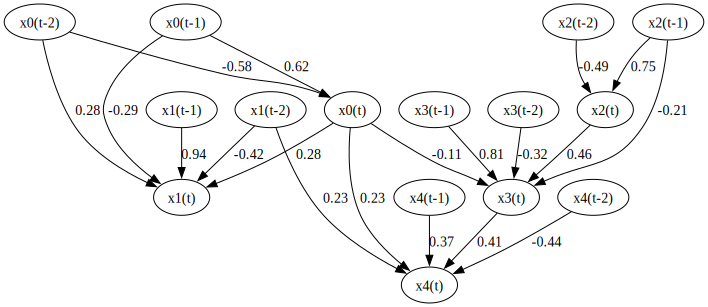

In [61]:
#labels = ['x0(t)', 'x1(t)', 'x2(t)', 'x3(t)', 'x4(t)', 'x0(t-1)', 'x1(t-1)', 'x2(t-1)', 'x3(t-1)', 'x4(t-1)']
#labels = ['x0(t)', 'x1(t)', 'x2(t)', 'x3(t)', 'x0(t-1)', 'x1(t-1)', 'x2(t-1)', 'x3(t-1)']
#labels = ['x0(t)', 'x1(t)', 'x2(t)', 'x3(t)', 'x4(t)', 'x5(t)', 'x0(t-1)', 'x1(t-1)', 'x2(t-1)', 'x3(t-1)', 'x4(t-1)', 'x5(t-1)']
n_features=B1_result.shape[0]
labels = [f'x{i}(t)' for i in range(n_features)] + [f'x{i}(t-1)' for i in range(n_features)] + [f'x{i}(t-2)' for i in range(n_features)]
dot = make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)


# Save pdf
dot.render('dag')

# Save png
dot.format = 'png'
dot.render('dag')

dot

## Independence between error variables
To check if the LiNGAM assumption is broken, we can get p-values of independence between error variables. The value in the i-th row and j-th column of the obtained matrix shows the p-value of the independence of the error variables $e_i$ and $e_j$.

In [325]:
p_values = model.get_error_independence_p_values()
print(p_values)

[[0.    0.823 0.379 0.446 0.753]
 [0.823 0.    0.751 0.637 0.224]
 [0.379 0.751 0.    0.647 0.503]
 [0.446 0.637 0.647 0.    0.032]
 [0.753 0.224 0.503 0.032 0.   ]]


## Bootstrap

### Bootstrapping
We call `bootstrap()` method instead of `fit()`. Here, the second argument specifies the number of bootstrap sampling.

In [358]:
model = lingam.VARLiNGAM()
result = model.bootstrap(X, n_sampling=100)

## Causal Directions
Since `BootstrapResult` object is returned, we can get the ranking of the causal directions extracted by `get_causal_direction_counts()` method. In the following sample code, `n_directions` option is limited to the causal directions of the top 8 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.3 or more.

In [359]:
cdc = result.get_causal_direction_counts(n_directions=8, min_causal_effect=0.3, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [363]:
print_causal_directions(cdc, 100, labels=labels)

x4(t) <--- x4(t-1) (b>0) (95.0%)
x3(t) <--- x3(t-1) (b>0) (79.0%)
x3(t) <--- x4(t-1) (b>0) (71.0%)
x2(t) <--- x3(t-1) (b>0) (63.0%)
x1(t) <--- x1(t-1) (b>0) (63.0%)
x2(t) <--- x2(t-1) (b>0) (52.0%)
x2(t) <--- x4(t-1) (b>0) (51.0%)
x0(t) <--- x0(t-1) (b>0) (49.0%)


## Directed Acyclic Graphs
Also, using the `get_directed_acyclic_graph_counts()` method, we can get the ranking of the DAGs extracted. In the following sample code, `n_dags` option is limited to the dags of the top 3 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.2 or more.

In [364]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.2, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [365]:
print_dagc(dagc, 100, labels=labels)

DAG[0]: 1.0%
	x0(t) <--- x1(t) (b<0)
	x0(t) <--- x2(t) (b<0)
	x0(t) <--- x4(t) (b<0)
	x0(t) <--- x0(t-1) (b>0)
	x0(t) <--- x4(t-1) (b>0)
	x1(t) <--- x2(t) (b>0)
	x1(t) <--- x1(t-1) (b>0)
	x2(t) <--- x2(t-1) (b>0)
	x3(t) <--- x0(t) (b>0)
	x3(t) <--- x1(t) (b<0)
	x3(t) <--- x2(t) (b<0)
	x3(t) <--- x4(t) (b<0)
	x3(t) <--- x1(t-1) (b>0)
	x3(t) <--- x3(t-1) (b>0)
	x3(t) <--- x4(t-1) (b>0)
	x4(t) <--- x1(t) (b<0)
	x4(t) <--- x2(t) (b>0)
	x4(t) <--- x0(t-1) (b>0)
	x4(t) <--- x1(t-1) (b>0)
	x4(t) <--- x2(t-1) (b<0)
	x4(t) <--- x3(t-1) (b<0)
	x4(t) <--- x4(t-1) (b>0)
DAG[1]: 1.0%
	x0(t) <--- x1(t) (b>0)
	x0(t) <--- x2(t) (b<0)
	x0(t) <--- x4(t) (b>0)
	x0(t) <--- x1(t-1) (b<0)
	x0(t) <--- x2(t-1) (b>0)
	x0(t) <--- x3(t-1) (b>0)
	x0(t) <--- x4(t-1) (b<0)
	x1(t) <--- x1(t-1) (b>0)
	x2(t) <--- x1(t) (b>0)
	x2(t) <--- x4(t) (b>0)
	x2(t) <--- x1(t-1) (b<0)
	x2(t) <--- x2(t-1) (b>0)
	x2(t) <--- x3(t-1) (b>0)
	x2(t) <--- x4(t-1) (b<0)
	x3(t) <--- x1(t) (b<0)
	x3(t) <--- x2(t) (b<0)
	x3(t) <--- x4(t) (b

## Probability
Using the `get_probabilities()` method, we can get the probability of bootstrapping.

In [366]:
prob = result.get_probabilities(min_causal_effect=0.1)
print('Probability of B0:\n', prob[0])
print('Probability of B1:\n', prob[1])

Probability of B0:
 [[0.   0.38 0.43 0.33 0.49]
 [0.36 0.   0.33 0.44 0.41]
 [0.4  0.46 0.   0.46 0.44]
 [0.5  0.45 0.46 0.   0.54]
 [0.34 0.36 0.38 0.37 0.  ]]
Probability of B1:
 [[0.7  0.48 0.33 0.59 0.75]
 [0.38 0.77 0.36 0.48 0.79]
 [0.58 0.49 0.78 0.66 0.73]
 [0.57 0.57 0.36 0.89 0.91]
 [0.54 0.51 0.53 0.59 0.98]]


## Total Causal Effects
Using the `get_causal_effects()` method, we can get the list of total causal effect. The total causal effects we can get are dictionary type variable.
We can display the list nicely by assigning it to pandas.DataFrame. Also, we have replaced the variable index with a label below.

In [367]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)
df = pd.DataFrame(causal_effects)

df['from'] = df['from'].apply(lambda x : labels[x])
df['to'] = df['to'].apply(lambda x : labels[x])
df

,from,to,effect,probability
0,x4(t-1),x4(t),0.606957,1.00
1,x4(t-1),x3(t),0.277388,0.97
2,x3(t-1),x3(t),0.462773,0.95
3,x4(t-1),x0(t),0.282672,0.94
4,x4(t-1),x1(t),0.130076,0.93
5,x0(t-1),x0(t),0.349524,0.87
6,x2(t-1),x1(t),-0.100967,0.84
7,x4(t-1),x2(t),0.145353,0.83
8,x2(t-1),x2(t),0.378778,0.83
9,x1(t-1),x1(t),0.369101,0.81


We can easily perform sorting operations with pandas.DataFrame.

In [368]:
df.sort_values('effect', ascending=False).head()

,from,to,effect,probability
30,x4(t),x2(t),1.199952,0.49
0,x4(t-1),x4(t),0.606957,1.00
44,x3(t),x0(t),0.533782,0.36
2,x3(t-1),x3(t),0.462773,0.95
27,x0(t),x3(t),0.442904,0.54


And with pandas.DataFrame, we can easily filter by keywords. The following code extracts the causal direction towards x1(t).

In [369]:
df[df['to']=='x1(t)'].head()

,from,to,effect,probability
4,x4(t-1),x1(t),0.130076,0.93
6,x2(t-1),x1(t),-0.100967,0.84
9,x1(t-1),x1(t),0.369101,0.81
11,x0(t-1),x1(t),0.129475,0.78
17,x3(t-1),x1(t),0.076273,0.70


Because it holds the raw data of the total causal effect (the original data for calculating the median), it is possible to draw a histogram of the values of the causal effect, as shown below.

(array([ 3.,  0., 29., 35., 29.,  1.,  1.,  0.,  1.,  1.]),
 array([-1.322, -0.876, -0.429,  0.017,  0.464,  0.91 ,  1.357,  1.803,
         2.25 ,  2.696,  3.143]),
 <BarContainer object of 10 artists>)

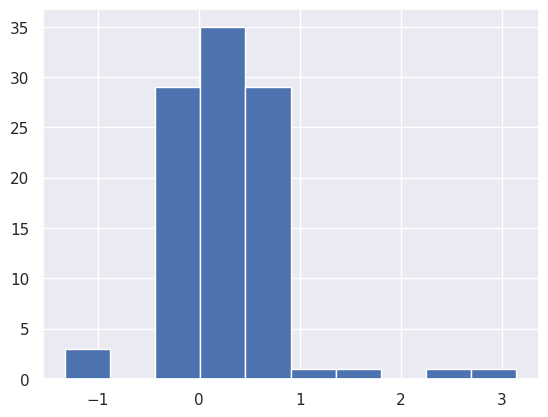

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from_index = 7 # index of x2(t-1). (index:2)+(n_features:5)*(lag:1) = 7
to_index = 2 # index of x2(t). (index:2)+(n_features:5)*(lag:0) = 2
plt.hist(result.total_effects_[:, to_index, from_index])